In [1]:
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [6]:
sex_df = pd.DataFrame(encoder.fit_transform(df[['Sex']]).toarray())
sex_name = ["Female", "Male"]
sex_df.columns = sex_name
print(sex_df.shape)
sex_df.head()

(319795, 2)


,Female,Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [7]:
def one_hot_encode(x:np.ndarray):
    uni = np.unique(x)
    print(uni)
    result = np.zeros((len(x), len(uni)))
    for i in range(len(x)):
        for j in range(len(uni)):
            if x[i] == uni[j]:
                result[i][j] = 1;
                
    return result

In [8]:
race_arr = pd.DataFrame(df['Race']).to_numpy()
one_hot_race = one_hot_encode(race_arr)
race_df = pd.DataFrame(one_hot_race, columns = ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other',
 'White'])
race_df.head()

['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']


,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
diabetic_arr = pd.DataFrame(df['Diabetic']).to_numpy()
one_hot_diabetic = one_hot_encode(diabetic_arr)
diabetic_df = pd.DataFrame(one_hot_diabetic, columns = ['Diabetic(No)', 'Diabetic(No, borderline diabetes)', 'Diabetic(Yes)', 'Diabetic(Yes, during pregnancy)'])
diabetic_df.head()

['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']


,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)"
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [10]:
gen_health_arr = pd.DataFrame(df['GenHealth']).to_numpy()
one_hot_gen_health = one_hot_encode(gen_health_arr)
gen_health_df = pd.DataFrame(one_hot_gen_health, columns = ['GenHealth(Excellent)', 'GenHealth(Fair)', 
                                                            'GenHealth(Good)', 'GenHealth(Poor)', 'GenHealth(Very good)'])
gen_health_df.head()

['Excellent' 'Fair' 'Good' 'Poor' 'Very good']


,GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [11]:
df = df.drop(['Sex', 'Race', 'GenHealth', 'Diabetic', 'AgeCategory', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], axis=1)
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Yes,Yes,No,Yes
1,No,No,No,Yes,No,Yes,No,No,No
2,No,Yes,No,No,No,Yes,Yes,No,No
3,No,No,No,No,No,No,No,No,Yes
4,No,No,No,No,Yes,Yes,No,No,No


In [12]:
df['Smoking'] = df['Smoking'].map(
                   {'Yes':1 ,'No':0})
df['HeartDisease'] = df['HeartDisease'].map(
                   {'Yes':1 ,'No':0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].map(
                   {'Yes':1 ,'No':0})
df['Stroke'] = df['Stroke'].map(
                   {'Yes':1 ,'No':0})
df['DiffWalking'] = df['DiffWalking'].map(
                   {'Yes':1 ,'No':0})
df['PhysicalActivity'] = df['PhysicalActivity'].map(
                   {'Yes':1 ,'No':0})
df['Asthma'] = df['Asthma'].map(
                   {'Yes':1 ,'No':0})
df['KidneyDisease'] = df['KidneyDisease'].map(
                   {'Yes':1 ,'No':0})
df['SkinCancer'] = df['SkinCancer'].map(
                   {'Yes':1 ,'No':0})
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,1,1,0,1
1,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,1,0,0,0


In [13]:
df = pd.concat([df, sex_df], axis=1, join='inner')
df = pd.concat([df, race_df], axis=1, join='inner')
df = pd.concat([df, diabetic_df], axis=1, join='inner')
df = pd.concat([df, gen_health_df], axis=1, join='inner')
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,...,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,0,1,0,0,0,1,1,0,1,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,1,0,1,0,0,0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,0,0,0,1,1,0,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,1,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,1,1,0,0,0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Normalization starts here:

In [14]:
# read file
original_df = pd.read_csv('heart_2020_cleaned.csv')
original_df.shape

(319795, 18)

In [15]:
# take a look at the dataset
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Processing numeric features

In [16]:
# age feature
original_df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [17]:
#replace the range with the first number
original_df['AgeCategory'] = original_df['AgeCategory'].replace(['80 or older'],'80-')
original_df['AgeCategory'] = original_df['AgeCategory'].str.split('-').str[0].astype('float64')

In [18]:
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80.0,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65.0,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75.0,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40.0,White,No,Yes,Very good,8.0,No,No,No


In [19]:
# process numeric features: BMI, PhysicalHealth, MentalHealth, AgeCategory, SleepTime
numeric_features = ['BMI','PhysicalHealth','MentalHealth','AgeCategory','SleepTime']
scaler = StandardScaler()
original_df[numeric_features] = scaler.fit_transform(original_df[numeric_features])

In [20]:
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.844750,Yes,No,No,-0.046751,3.281069,No,Female,0.141621,White,Yes,Yes,Very good,-1.460354,Yes,No,Yes
1,No,-1.256338,No,No,Yes,-0.424070,-0.490039,No,Female,1.525151,White,No,Yes,Very good,-0.067601,No,No,No
2,No,-0.274603,Yes,No,No,2.091388,3.281069,No,Male,0.695033,White,Yes,Yes,Fair,0.628776,Yes,No,No
3,No,-0.647473,No,No,No,-0.424070,-0.490039,No,Female,1.248445,White,No,No,Good,-0.763977,No,No,Yes
4,No,-0.726138,No,No,No,3.097572,-0.490039,Yes,Female,-0.688497,White,No,Yes,Very good,0.628776,No,No,No


In [21]:
original_df = original_df.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 
                                'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)

In [22]:
original_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601
2,-0.274603,2.091388,3.281069,0.695033,0.628776
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776


In [23]:
original_df = pd.concat([original_df, df], axis=1, join='inner')

# Dataframe after cleaning:

In [24]:
result_df = original_df
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,...,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
pd.set_option('display.max_columns', None)
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
result_df = result_df.drop(['Diabetic(No, borderline diabetes)', 'Diabetic(Yes, during pregnancy)'], axis=1)
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),Diabetic(Yes),GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Logistic Regression starts here

In [27]:
result_df = result_df.drop(['Asian','Black','Hispanic','Other','White'], axis = 1)
split_data = []
for i in range(3):
    split_data.append(result_df.sample(result_df.shape[0]//3, replace = False, random_state = 42))

In [28]:
X = split_data[0]
X = X.drop(['HeartDisease'], axis=1)
y = split_data[0]
y = y["HeartDisease"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
clf = LogisticRegression(penalty='l2', C=1.0, random_state=0)
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)

In [31]:
print(score_test)

0.9133833646028768


In [32]:
y_pred_test = clf.predict(X_test)

In [33]:
class_report_test = classification_report(y_test, y_pred_test)
print(class_report_test)


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32090
           1       0.53      0.10      0.17      3088

    accuracy                           0.91     35178
   macro avg       0.73      0.55      0.56     35178
weighted avg       0.89      0.91      0.89     35178



In [34]:
scores = clf.predict_proba(X_test)[:,1]
scores

array([0.0380208 , 0.00746485, 0.07357107, ..., 0.0088013 , 0.21861936,
       0.00524188])

In [35]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve


Area under the Receiver Operating Characteristic curve: 0.8369688977890875


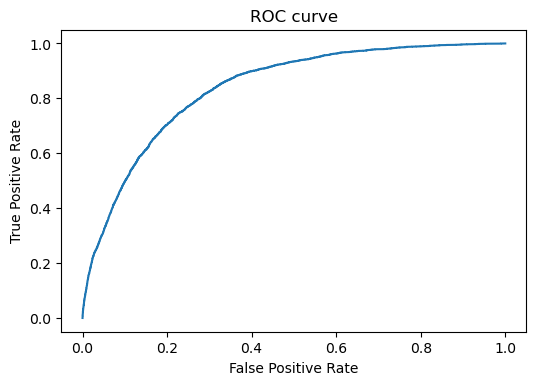

In [36]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores, pos_label=1)
roc_auc = roc_auc_score(y_test, scores)
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc)

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kf)
scores

array([0.91290955, 0.91430972, 0.91977037, 0.91514982, 0.91360963,
       0.91612994, 0.91697004, 0.9091291 , 0.91388967, 0.91669   ])

## GridSearch find parameters

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [43]:
model = LogisticRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [0.01, 0.05, 0.075, 0.1, 0.2, 0.25, 0.5, 1, 10]
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\shli_\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.91472417 0.91472977        nan 0.91473537 0.91472697        nan
        nan 0.91483618        nan 0.91488939 0.91485858 0.91485858
 0.91453654 0.91485298 0.91485858        nan        nan        nan
        nan        nan 0.91472417 0.91472977        nan 0.91473257
 0.91473257        nan        nan 0.9149622         nan 0.9149734
 0.91480818 0.91480818 0.91475217 0.91480818 0.91480538        nan
        nan        nan        nan        nan 0.91472417 0.91472977
        nan 0.91472697 0.91472697        nan        nan 0.91488379
        nan 0.91494539 0.91476057 0.91476057 0.91472697 0.91476057
 0.91476057        nan        nan        nan        nan        nan
 0.91472417 0.91472977        nan 0.91473257 0.91473537        nan
        nan 0.91490899        nan 0.91488099 0.91476057 0.91476057
 0.91472977 0.91476057 0.91476337        nan        na

Best Score: 0.9149733968076168
Best Hyperparameters: {'C': 0.05, 'penalty': 'l1', 'solver': 'saga'}


In [44]:
clf_best = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=0)
clf_best.fit(X_train, y_train)
score_best = clf_best.score(X_test, y_test)
print(score_best)

0.9134686451759623
